In [41]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [42]:
md=pd.read_csv("mobile_battery_life_sample.csv")

In [43]:
md.head(10)

,Battery_Capacity_mAh,Screen_Size_inch,Daily_Usage_Hours,Battery_Life_Hours
0,5419,5.0,3,6
1,3803,5.5,4,5
2,5218,6.1,3,5
3,3695,5.5,7,6
4,5461,6.7,7,6
5,4639,6.5,5,6
6,4531,6.0,5,6
7,4178,5.0,3,5
8,4270,6.8,5,5
9,4681,6.5,3,5


In [44]:
#define features
#define input features
X= md[["Battery_Capacity_mAh","Screen_Size_inch","Daily_Usage_Hours"]]
#define output features
Y= md[["Battery_Life_Hours"]]

In [45]:
#splietting data sets
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3, random_state=12)

In [69]:
from sklearn.linear_model import LinearRegression
regressorLR=LinearRegression()
regressorLR.fit(X_train,y_train) #train the linear regression model

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [70]:
from sklearn.tree import DecisionTreeClassifier
tree_model= DecisionTreeClassifier(random_state =12)
tree_model.fit(X_train,y_train) #train the linear Descison Tree Regression

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,12
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [71]:
print(X_test)

     Battery_Capacity_mAh  Screen_Size_inch  Daily_Usage_Hours
31                   5253               6.0                  6
91                   4587               6.5                  7
26                   3269               6.7                  7
99                   4044               6.0                  4
72                   3828               6.8                  3
51                   5471               6.5                  9
71                   4204               5.5                  8
1                    3803               5.5                  4
97                   3585               6.1                  8
11                   3084               5.0                  8
15                   5295               6.7                  4
8                    4270               6.8                  5
19                   3670               6.7                  6
109                  4669               5.5                  9
111                  3451               6.7            

In [72]:
y_predLR=regressorLR.predict(X_test) #predicted by linear regression

In [73]:
print(y_predLR)

[[6.09209892]
 [6.25860869]
 [6.56662596]
 [6.36454372]
 [6.42623413]
 [6.06118294]
 [6.33139801]
 [6.41070784]
 [6.48563892]
 [6.58045982]
 [6.08902963]
 [6.33083429]
 [6.47075096]
 [6.2273761 ]
 [6.53124136]
 [6.30175855]
 [6.11092388]
 [6.60593378]
 [6.31136897]
 [6.63932092]
 [6.25874457]
 [6.58790364]
 [6.08255498]
 [6.2785528 ]
 [6.16068774]
 [6.36460309]
 [6.22365874]
 [6.55053595]
 [6.30300705]
 [6.25946407]
 [6.59158832]
 [6.11063454]
 [6.45447657]
 [6.61920621]
 [6.37547263]
 [6.21994256]]


In [74]:
print(y_test)

     Battery_Life_Hours
31                    5
91                    8
26                    7
99                    7
72                    8
51                    5
71                    8
1                     5
97                    6
11                    7
15                    6
8                     5
19                    8
109                   7
111                   8
14                    5
21                    7
17                    7
7                     5
40                    6
24                    8
39                    6
98                    5
61                    7
108                   5
64                    8
9                     5
95                    8
116                   5
110                   8
12                    8
77                    6
103                   5
23                    6
114                   7
16                    7


In [75]:
#predict decision tree model
y_pred = tree_model.predict(X_test)
#view prediction
print(y_pred)

[5 6 8 8 7 6 5 6 5 5 5 6 8 6 8 8 5 8 6 8 7 5 5 6 6 7 7 7 8 6 7 6 8 7 8 6]


In [77]:
#evaluating the model using mean squared error
from sklearn.metrics import mean_squared_error
mseDT=mean_squared_error(y_test,y_pred) #mse for decision tree
mseLR=mean_squared_error(y_test,y_predLR) #mse for linear regression

In [78]:
print(mseDT)

2.25


In [79]:
print(mseLR)

1.3376939769056342


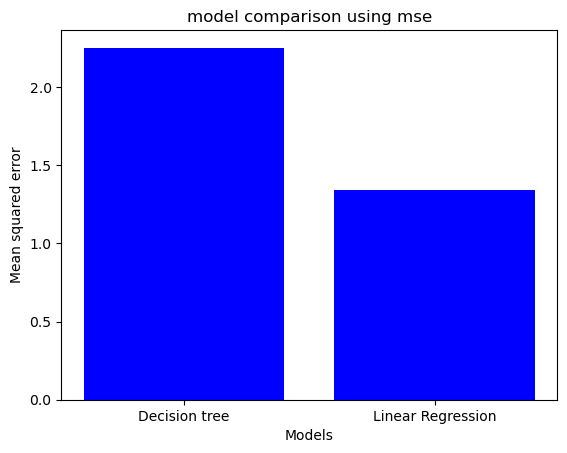

In [80]:
#visualization
import matplotlib.pyplot as plt
import seaborn as sns
#plotting a bar graph to compare which model is better
#lower mse better model
models = ["Decision tree","Linear Regression"]
mse_values = [mseDT,mseLR]
plt.bar(models,mse_values,color="blue")
plt.title("model comparison using mse")
plt.xlabel("Models")
plt.ylabel("Mean squared error")
plt.show()

In [82]:
#Save model
import joblib
joblib.dump(regressorLR,"Mobilebatteryhealth_model.pkl")

['Mobilebatteryhealth_model.pkl']

In [89]:

# Load the saved model
model = joblib.load("Mobilebatteryhealth_model.pkl")

print("📱 Welcome to the Mobile Battery Life Predictor!")

# Ask for user details
User_Name = input("Enter your name: ")
Battery_Capacity = int(input("Enter Battery Capacity (mAh) [2800-6000]: "))
Screen_Size = float(input("Enter Screen Size (inches) [4.5-7.0]: "))
Daily_Usage = int(input("Enter Daily Usage (hours) [1-12]: "))

# Prepare input for the model
input_data = np.array([[Battery_Capacity, Screen_Size, Daily_Usage]])

# Make prediction
# predicted_battery_life = model.predict(input_data)
# prediction = float(predicted_battery_life[0])
prediction = predicted_battery_life.item() 

# Display result with user-friendly message
print(f"\nHello {User_Name}!")
print(f"Based on your inputs, the predicted battery life is: {prediction:.2f} Hours")


📱 Welcome to the Mobile Battery Life Predictor!


Enter your name:  cate
Enter Battery Capacity (mAh) [2800-6000]:  2800
Enter Screen Size (inches) [4.5-7.0]:  5
Enter Daily Usage (hours) [1-12]:  6



Hello cate!
Based on your inputs, the predicted battery life is: 6.64 Hours
